Text(0.5, 1.0, 'Thresholded Image')

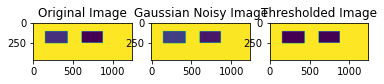

In [15]:
import cv2
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('image.png',0)

# Add Gaussian noise to the image
noise = np.random.normal(0, 1, img.shape)
noisy_img = img + noise

# Convert the image type to CV_8UC1
noisy_img = cv2.convertScaleAbs(noisy_img)

# Implement Otsu's thresholding algorithm
threshold_value, threshold_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the original image, noisy image, and thresholded image
fig,arr= plt.subplots(1,3)

arr[0].imshow(img)
arr[0].set_title('Original Image')

arr[1].imshow(noisy_img)
arr[1].set_title('Gaussian Noisy Image')

arr[2].imshow(threshold_img)
arr[2].set_title('Thresholded Image')




<ipython-input-13-fc3808864b7d>:27: RuntimeWarning: overflow encountered in ubyte_scalars
  if mask[pixel] == 0 and abs(img[pixel] - img[seed]) <= threshold:


Text(0.5, 1.0, 'Segmented Region')

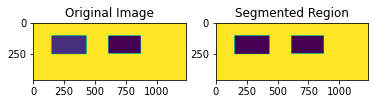

In [13]:
# Load the image
import cv2
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

img = cv2.imread('image.png',0)

# Select a seed pixel within the object of interest
seed = (50, 50)

# Define a threshold range of pixel values around the seed pixel
threshold = 10

# Initialize an empty mask of the same shape as the input image
mask = np.zeros_like(img)

# Initialize a list of neighboring pixels to the seed pixel
neighbors = [seed]

# While the list of neighboring pixels is not empty:
while neighbors:
    # Pop a neighboring pixel from the list
    pixel = neighbors.pop()

    # If the pixel is not already marked in the mask and its value falls within the threshold range:
    if mask[pixel] == 0 and abs(img[pixel] - img[seed]) <= threshold:
        # Add the pixel to the segmented region and mark it in the mask
        mask[pixel] = 255

        # Add all unmarked neighboring pixels to the list
        x, y = pixel
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                if 0 <= x+i < img.shape[0] and 0 <= y+j < img.shape[1]:
                    if mask[x+i, y+j] == 0:
                        neighbors.append((x+i, y+j))

# Display the original image and the segmented region


fig,arr= plt.subplots(1,2)

arr[0].imshow(img)
arr[0].set_title('Original Image')

arr[1].imshow(mask)
arr[1].set_title('Segmented Region')

